In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [32]:
raw_directory = '/Users/keithatienza/Desktop/Academics/Modern Data Analytics/Horizon-Europe-MDA/data/raw'

In [33]:
euroscivoc = pd.read_excel(raw_directory + "/euroSciVoc" + ".xlsx")
legalbasis = pd.read_excel(raw_directory + "/legalBasis" + ".xlsx")
organization = pd.read_excel(raw_directory + "/organization" + ".xlsx")
project = pd.read_excel(raw_directory + "/project" + ".xlsx")
deliverables = pd.read_excel(raw_directory + "/projectDeliverables" + ".xlsx")
publications = pd.read_excel(raw_directory + "/projectPublications" + ".xlsx")
reports = pd.read_excel(raw_directory + "/reportSummaries" + ".xlsx")
topics = pd.read_excel(raw_directory + "/topics" + ".xlsx")
weblink = pd.read_excel(raw_directory + "/webLink" + ".xlsx")

/Users/keithatienza/Desktop/Academics/Modern Data Analytics/Horizon-Europe-MDA/.venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/keithatienza/Desktop/Academics/Modern Data Analytics/Horizon-Europe-MDA/.venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/keithatienza/Desktop/Academics/Modern Data Analytics/Horizon-Europe-MDA/.venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/keithatienza/Desktop/Academics/Modern Data Analytics/Horizon-Europe-MDA/.venv/lib/python3.13/site-packages/open

In [34]:
project.head()

id    acronym  status  \
0  101116741        DOE  SIGNED   
1  101163161    IRASTRO  SIGNED   
2  101160499   In-phase  SIGNED   
3  101166905   mw-atlas  SIGNED   
4  101162875  MAtCHLESS  SIGNED   

                                               title   startDate     endDate  \
0  Digitizing Other Economies: A Comparative Appr...  2024-02-01  2029-01-31   
1  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
2  Multiscale modelling of aberrant phase transit...  2025-06-01  2030-05-31   
3     The first comprehensive Atlas of the Milky Way  2025-05-01  2031-04-30   
4  Untapping multiparametric 2D luminescence sens...  2025-03-01  2030-02-28   

  totalCost ecMaxContribution   legalBasis        topics ecSignatureDate  \
0   1499998           1499998  HORIZON.1.1  ERC-2023-STG      2023-12-15   
1  12085363          12085363  HORIZON.1.1  ERC-2024-SyG      2025-02-20   
2   1489128           1489128  HORIZON.1.1  ERC-2024-STG      2025-02-19   
3   9957560           9957560  HORIZON.1.1  ERC-2024-SyG      2025-02-20   
4   1500000           1500000  HORIZON.1.1  ERC-2024-STG      2025-02-18   

  frameworkProgramme    masterCall       subCall    fundingScheme  nature  \
0            HORIZON  ERC-2023-STG  ERC-2023-STG      HORIZON-ERC     NaN   
1            HORIZON  ERC-2024-SyG  ERC-2024-SyG  HORIZON-ERC-SYG     NaN   
2            HORIZON  ERC-2024-STG  ERC-2024-STG      HORIZON-ERC     NaN   
3            HORIZON  ERC-2024-SyG  ERC-2024-SyG  HORIZON-ERC-SYG     NaN   
4            HORIZON  ERC-2024-STG  ERC-2024-STG      HORIZON-ERC     NaN   

                                           objective    contentUpdateDate  \
0  How do longstanding, primarily non-industrial,...  2023-12-26 14:40:12   
1  The James Webb Space Telescope (JWST) has ushe...  2025-02-24 17:23:14   
2  The spatiotemporal organization of the cell ma...  2025-02-24 17:23:11   
3  The Milky Way is the cosmic environment in whi...  2025-02-24 17:23:01   
4  Cellular organisms are complex machines whose ...  2025-02-24 17:23:12   

      rcn           grantDoi  
0  259247  10.3030/101116741  
1  268970  10.3030/101163161  
2  268969  10.3030/101160499  
3  268971  10.3030/101166905  
4  268966  10.3030/101162875

In [41]:
euroscivoc

projectID         euroSciVocCode  \
0      101116741             /29/97/543   
1      101163161  /27/81/30021/30833628   
2      101163161    /23/43/251/48354418   
3      101163161         /23/43/257/761   
4      101163161                 /29/89   
...          ...                    ...   
38784  101071191    /23/47/297/933/1589   
38785  101114487             /21/39/211   
38786  101114060             /21/39/697   
38787  101114240             /21/39/235   
38788  101113949         /21/39/239/737   

                                          euroSciVocPath      euroSciVocTitle  \
0      /social sciences/political sciences/government...   government systems   
1      /agricultural sciences/agriculture, forestry, ...  grains and oilseeds   
2      /natural sciences/physical sciences/optics/mic...           microscopy   
3      /natural sciences/physical sciences/astronomy/...       astrochemistry   
4                                   /social sciences/law                  law   
...                                                  ...                  ...   
38784  /natural sciences/computer and information sci...        deep learning   
38785  /medical and health sciences/clinical medicine...          dermatology   
38786  /medical and health sciences/clinical medicine...           obstetrics   
38787  /medical and health sciences/clinical medicine...           psychiatry   
38788  /medical and health sciences/clinical medicine...         orthodontics   

       euroSciVocDescription  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
...                      ...  
38784                    NaN  
38785                    NaN  
38786                    NaN  
38787                    NaN  
38788                    NaN  

[38789 rows x 5 columns]

EXPLORATION

Which topics obtain the most funding from the EU?

In [44]:
# Merge the project and euroscivoc dataframes on projectID
merged_df = pd.merge(project, euroscivoc, left_on='id', right_on='projectID', how='inner')

# Convert ecMaxContribution to numeric (if not already)
merged_df['ecMaxContribution'] = pd.to_numeric(merged_df['ecMaxContribution'], errors='coerce')

# Group by euroSciVocTitle and calculate the sum of ecMaxContribution
ecMaxContribution_per_euroSciVocTitle = merged_df.groupby('euroSciVocTitle')['ecMaxContribution'].sum()
ecMaxContribution_per_euroSciVocTitle = ecMaxContribution_per_euroSciVocTitle.sort_values(ascending=False)

# Display the result
print(ecMaxContribution_per_euroSciVocTitle)

euroSciVocTitle
ecosystems                    2.199000e+09
energy and fuels              9.342533e+08
oncology                      8.464026e+08
governance                    7.432081e+08
proteins                      6.889086e+08
                                  ...     
otorhinolaryngology           0.000000e+00
paediatrics                   0.000000e+00
inertial navigation system    0.000000e+00
urban engineering             0.000000e+00
highway engineering           0.000000e+00
Name: ecMaxContribution, Length: 961, dtype: float64


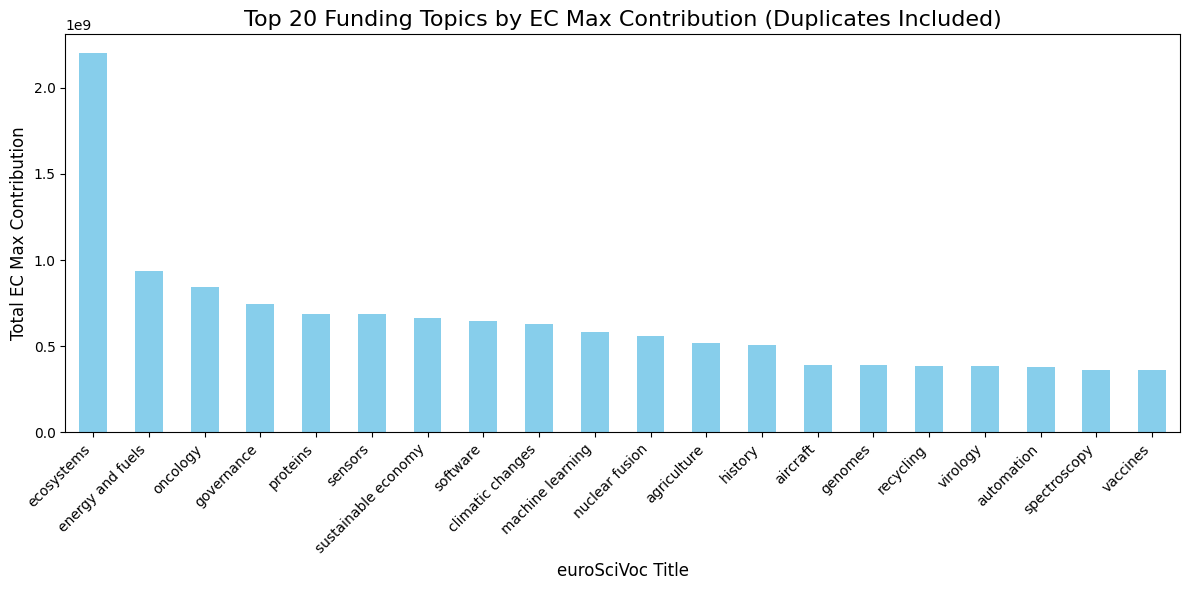

In [48]:
# Plot the data as a bar chart
plt.figure(figsize=(12, 6))
ecMaxContribution_per_euroSciVocTitle.head(20).plot(kind='bar', color='skyblue')  # Display the top 10 for better readability

# Add labels and title
plt.title('Top 20 Funding Topics by EC Max Contribution (Duplicates Included)', fontsize=16)
plt.xlabel('euroSciVoc Title', fontsize=12)
plt.ylabel('Total EC Max Contribution', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

Which organizations have the most number of projects / highest funding amount by the EU?

In [60]:
# Merge the project and organization DataFrames on the organization ID
merged_org_project = pd.merge(project, organization, left_on='id', right_on='projectID', how='inner')
merged_org_project['ecMaxContribution'] = pd.to_numeric(merged_org_project['ecMaxContribution'], errors='coerce')

# Group by organization name and calculate the number of projects and total funding
organization_stats = merged_org_project.groupby('name').agg(
    num_projects=('projectID', 'count'),  # Count the number of projects
    total_funding=('ecMaxContribution', 'sum')  # Sum the funding amounts
)

# Sort by the number of projects and total funding
most_projects = organization_stats.sort_values(by='num_projects', ascending=False)
highest_funding = organization_stats.sort_values(by='total_funding', ascending=False)

# Display the top 10 organizations for both metrics
print("Top 10 Organizations by Number of Projects:")
print(most_projects.head(10))

print("\nTop 10 Organizations by Total Funding:")
print(highest_funding.head(10))

Top 10 Organizations by Number of Projects:
                                                    num_projects  \
name                                                               
CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS           1007   
AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACI...           616   
FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGEW...           550   
KATHOLIEKE UNIVERSITEIT LEUVEN                               469   
CONSIGLIO NAZIONALE DELLE RICERCHE                           431   
KOBENHAVNS UNIVERSITET                                       393   
TECHNISCHE UNIVERSITEIT DELFT                                378   
COMMISSARIAT A L ENERGIE ATOMIQUE ET AUX ENERGI...           372   
MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISSE...           364   
DANMARKS TEKNISKE UNIVERSITET                                350   

                                                    total_funding  
name                                                               
CEN

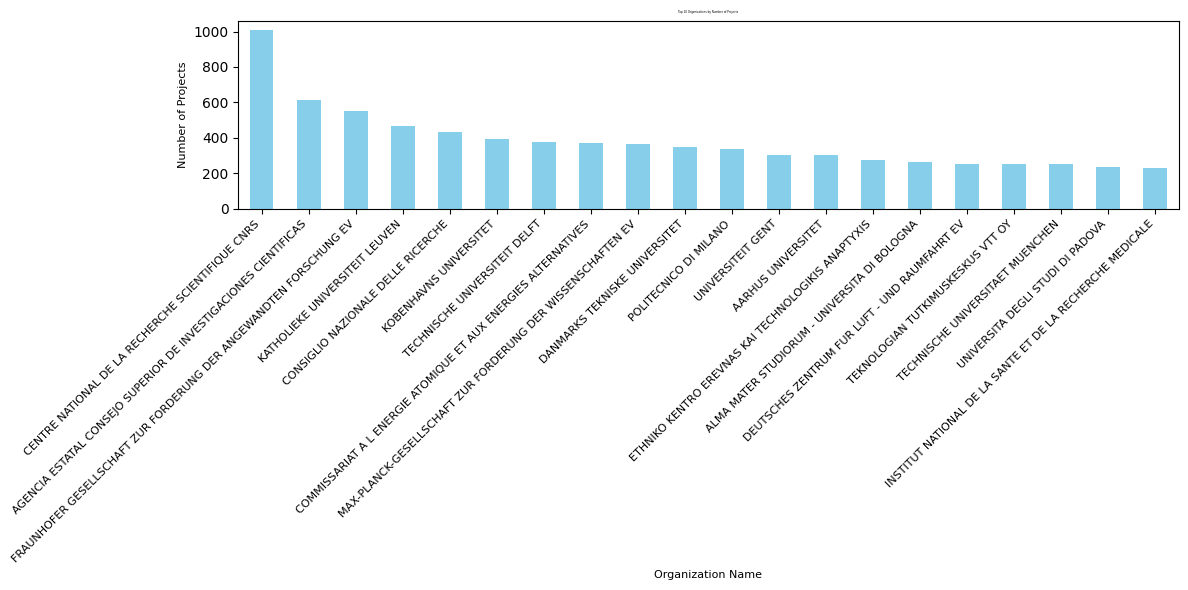

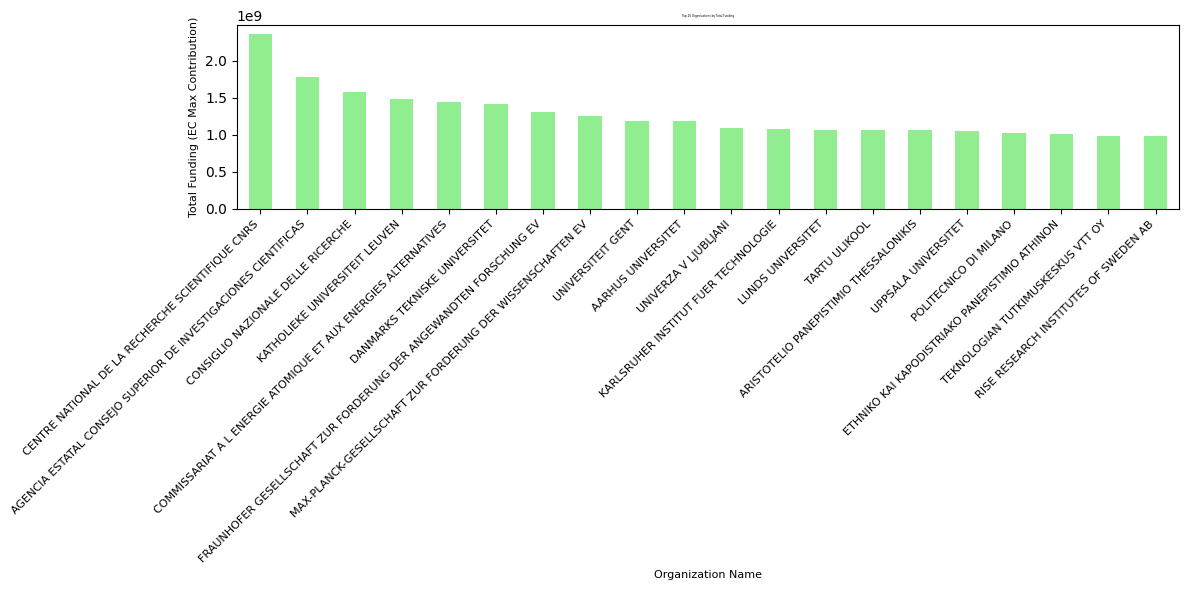

In [64]:

# Visualize the top 10 organizations by number of projects
plt.figure(figsize=(12, 6))
most_projects.head(20)['num_projects'].plot(kind='bar', color='skyblue')
plt.title('Top 20 Organizations by Number of Projects', fontsize=2)
plt.xlabel('Organization Name', fontsize=8)
plt.ylabel('Number of Projects', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

# Visualize the top 10 organizations by total funding
plt.figure(figsize=(12, 6))
highest_funding.head(20)['total_funding'].plot(kind='bar', color='lightgreen')
plt.title('Top 20 Organizations by Total Funding', fontsize=2)
plt.xlabel('Organization Name', fontsize=8)
plt.ylabel('Total Funding (EC Max Contribution)', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

How many signed projects are there over time? How many active projects are there over time?

In [76]:
project 

id    acronym  status  \
0      101116741        DOE  SIGNED   
1      101163161    IRASTRO  SIGNED   
2      101160499   In-phase  SIGNED   
3      101166905   mw-atlas  SIGNED   
4      101162875  MAtCHLESS  SIGNED   
...          ...        ...     ...   
15336  101114220    ModelMe  CLOSED   
15337  101114193       Cogo  SIGNED   
15338  101114191    HORIZER  CLOSED   
15339  101114035   iComplai  CLOSED   
15340  101121353        E2i  SIGNED   

                                                   title  startDate  \
0      Digitizing Other Economies: A Comparative Appr... 2024-02-01   
1      MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ... 2025-08-01   
2      Multiscale modelling of aberrant phase transit... 2025-06-01   
3         The first comprehensive Atlas of the Milky Way 2025-05-01   
4      Untapping multiparametric 2D luminescence sens... 2025-03-01   
...                                                  ...        ...   
15336                   Deployment of ModelMe Innovation 2023-07-01   
15337  Cogo - all ride in one app. Cogo gathers elect... 2023-07-01   
15338                                            HORIZER 2023-07-01   
15339  AI-powered early warning and surveillance syst... 2023-07-01   
15340  Engage2innovate – Enhancing security solution ... 2023-08-01   

         endDate totalCost ecMaxContribution   legalBasis  \
0     2029-01-31   1499998           1499998  HORIZON.1.1   
1     2031-07-31  12085363          12085363  HORIZON.1.1   
2     2030-05-31   1489128           1489128  HORIZON.1.1   
3     2031-04-30   9957560           9957560  HORIZON.1.1   
4     2030-02-28   1500000           1500000  HORIZON.1.1   
...          ...       ...               ...          ...   
15336 2024-01-31         0             75000  HORIZON.3.2   
15337 2024-06-30         0             75000  HORIZON.3.2   
15338 2024-03-31         0             75000  HORIZON.3.2   
15339 2024-03-31         0             75000  HORIZON.3.2   
15340 2027-03-31   1286125           1286125  HORIZON.2.3   

                               topics  ... frameworkProgramme  \
0                        ERC-2023-STG  ...            HORIZON   
1                        ERC-2024-SyG  ...            HORIZON   
2                        ERC-2024-STG  ...            HORIZON   
3                        ERC-2024-SyG  ...            HORIZON   
4                        ERC-2024-STG  ...            HORIZON   
...                               ...  ...                ...   
15336  HORIZON-EIE-2022-SCALEUP-02-02  ...            HORIZON   
15337  HORIZON-EIE-2022-SCALEUP-02-02  ...            HORIZON   
15338  HORIZON-EIE-2022-SCALEUP-02-02  ...            HORIZON   
15339  HORIZON-EIE-2022-SCALEUP-02-02  ...            HORIZON   
15340     HORIZON-CL3-2022-SSRI-01-04  ...            HORIZON   

                        masterCall                      subCall  \
0                     ERC-2023-STG                 ERC-2023-STG   
1                     ERC-2024-SyG                 ERC-2024-SyG   
2                     ERC-2024-STG                 ERC-2024-STG   
3                     ERC-2024-SyG                 ERC-2024-SyG   
4                     ERC-2024-STG                 ERC-2024-STG   
...                            ...                          ...   
15336  HORIZON-EIE-2022-SCALEUP-02  HORIZON-EIE-2022-SCALEUP-02   
15337  HORIZON-EIE-2022-SCALEUP-02  HORIZON-EIE-2022-SCALEUP-02   
15338  HORIZON-EIE-2022-SCALEUP-02  HORIZON-EIE-2022-SCALEUP-02   
15339  HORIZON-EIE-2022-SCALEUP-02  HORIZON-EIE-2022-SCALEUP-02   
15340     HORIZON-CL3-2022-SSRI-01     HORIZON-CL3-2022-SSRI-01   

         fundingScheme nature  \
0          HORIZON-ERC    NaN   
1      HORIZON-ERC-SYG    NaN   
2          HORIZON-ERC    NaN   
3      HORIZON-ERC-SYG    NaN   
4          HORIZON-ERC    NaN   
...                ...    ...   
15336      HORIZON-CSA    NaN   
15337      HORIZON-CSA    NaN   
15338      HORIZON-CSA    NaN   
15339      HORIZON-CSA    NaN   
15340     

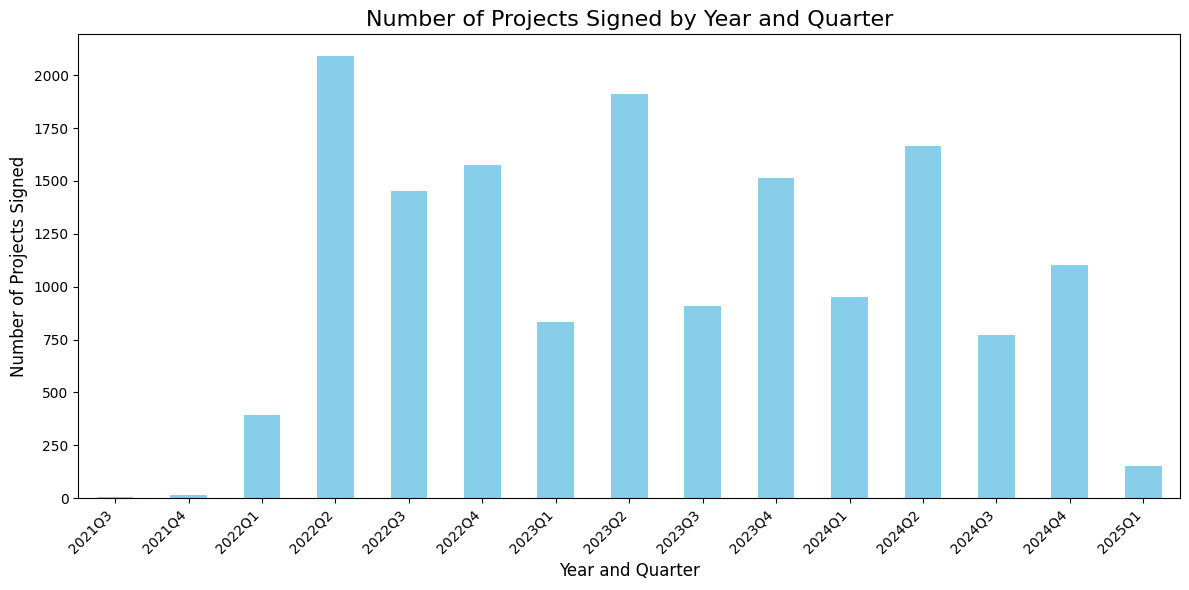

In [ ]:
# Convert signedDate to datetime format
project['ecSignatureDate'] = pd.to_datetime(project['ecSignatureDate'], errors='coerce')

# Extract year and quarter from signedDate
project['year_quarter'] = project['ecSignatureDate'].dt.to_period('Q')

# Count the number of projects signed per year and quarter
projects_signed = project.groupby('year_quarter').size()

# Plot the number of projects signed as a bar plot
plt.figure(figsize=(12, 6))
projects_signed.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Number of Projects Signed by Year and Quarter', fontsize=16)
plt.xlabel('Year and Quarter', fontsize=12)
plt.ylabel('Number of Projects Signed', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/1g/drrbdl5d5tz58v9sn33gqfb40000gn/T/ipykernel_39512/2383598510.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  date_range = pd.date_range(start=project['startDate'].min(), end='2025-03-31', freq='Q')


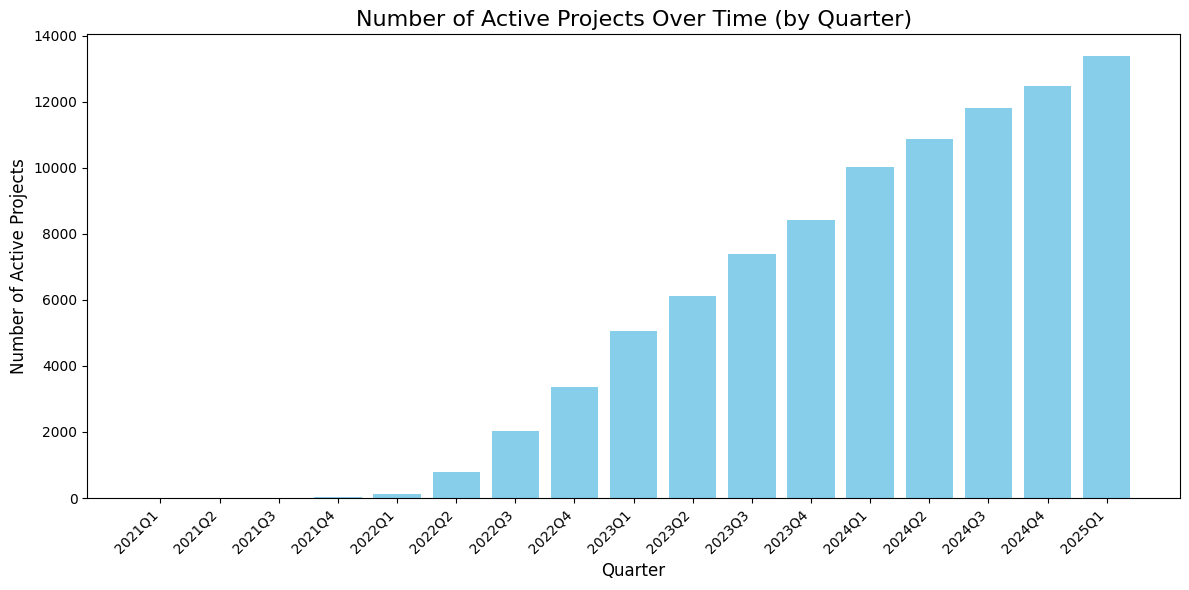

In [74]:
# Convert startDate and endDate to datetime format
project['startDate'] = pd.to_datetime(project['startDate'], errors='coerce')
project['endDate'] = pd.to_datetime(project['endDate'], errors='coerce')

# Create a date range for the entire period covered by the projects, limited to Q1 2025
date_range = pd.date_range(start=project['startDate'].min(), end='2025-03-31', freq='Q')

# Create a DataFrame to track active projects for each quarter
active_projects = pd.DataFrame({'quarter': date_range.to_period('Q')})
active_projects['num_active_projects'] = 0

# Iterate through each project and count active quarters
for _, row in project.iterrows():
    if pd.notnull(row['startDate']) and pd.notnull(row['endDate']):
        active_period = pd.period_range(start=row['startDate'], end=row['endDate'], freq='Q')
        active_projects.loc[active_projects['quarter'].isin(active_period), 'num_active_projects'] += 1

# Plot the number of active projects as a bar plot
plt.figure(figsize=(12, 6))
plt.bar(active_projects['quarter'].astype(str), active_projects['num_active_projects'], color='skyblue')

# Add labels and title
plt.title('Number of Active Projects Over Time (by Quarter)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of Active Projects', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()